In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
import matplotlib.gridspec as gridspec

# functions needed for pr_auc_score()
from sklearn.metrics import auc, precision_recall_curve

from sklearn.metrics import confusion_matrix

# functions needed for imbalanced_cross_validation_score()
from sklearn.model_selection import StratifiedKFold

# sampler objects
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Classification models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



In [3]:
df=pd.read_csv('./creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
A  = df.values
x  = A[:,:-1]     
y  = A[:,-1]
vr=x[:,0]
am=x[:,29]
scaler = preprocessing.StandardScaler()

vr=vr.reshape(-1,1)
vr=scaler.fit_transform(vr)
am=am.reshape(-1,1)
am=scaler.fit_transform(am)

x[:,0]=vr[:,0]
x[:,29]=am[:,0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [6]:
print(X_train.shape)

(199364, 30)


# Logistic regresion smote

In [18]:
from sklearn.linear_model import LogisticRegression as LR
lr_pipeline = Pipeline([('smt', SMOTE(random_state=42,sampling_strategy= 0.04)),
                        ('classifier', LR(random_state = 5,solver='lbfgs',C= 0.085))
                       ])

In [23]:
from sklearn.model_selection import GridSearchCV #new with version 0.18
from sklearn.model_selection import cross_validate
lr_param_range = [0.075,0.085,0.01,0.03,0.1,0.3,0.5,0.8]
lr_param_range1 = [0.01,0.04,0.06,0.1,0.3,0.5,0.9]
lr_param_grid = [{'classifier__C':lr_param_range,'smt__sampling_strategy':lr_param_range1},
                 
                ]
gridsearch_lr = GridSearchCV(estimator = lr_pipeline,
                          param_grid = lr_param_grid,
                          scoring='f1',
                          n_jobs=1  ,verbose=100,
                          cv = 2)


In [24]:
gridsearch_lr.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] classifier__C=0.085, smt__sampling_strategy=0.04 ................
[CV]  classifier__C=0.085, smt__sampling_strategy=0.04, score=0.6585365853658536, total=   2.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[CV] classifier__C=0.085, smt__sampling_strategy=0.04 ................
[CV]  classifier__C=0.085, smt__sampling_strategy=0.04, score=0.7407407407407408, total=   1.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('smt', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=42, ratio=None,
   sampling_strategy=0.04, svm_estimator='deprecated')), ('classifier', LogisticRegression(C=0.085, class_weight=None... penalty='l2', random_state=5, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'classifier__C': [0.085], 'smt__sampling_strategy': [0.04]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=100)

In [25]:

gridsearch_best_estimator_lr=gridsearch_lr.best_estimator_
print(gridsearch_lr.best_score_)
print(gridsearch_lr.best_params_)

0.6996382507213046
{'classifier__C': 0.085, 'smt__sampling_strategy': 0.04}


In [16]:
def draw_ConfusionMatrix(conf_matrix, classifier_name):
    ''' The confusion matrix draw function'''
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
    plt.title('Confusion Matrix for %s' % classifier_name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

[[85211    77]
 [   19   136]]


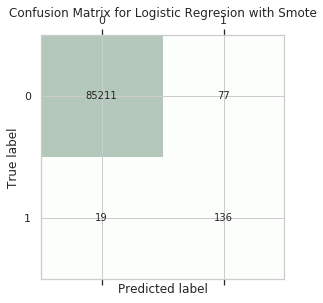

Acc: 0.999
Precision: 0.638
Recall: 0.877
F1: 0.739


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

bla=gridsearch_best_estimator_lr.fit(X_train,y_train)
score = bla.score(X_test, y_test)
y_pred=bla.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)
draw_ConfusionMatrix(confmat,"Logistic Regresion with Smote")
print('Acc: %.3f' % score)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


# SVM smote


In [29]:
from sklearn.svm import SVC
pipe_svc = Pipeline(
    [
        (
            'smt', SMOTE(random_state=42)
        ),
        (
            'classifier', SVC(random_state = 5)
        
        )           
    ]

)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score
param_range = [0.001,0.1,0.6]
smt_param_range = [0.07,0.3,0.5]
param_grid = [{'classifier__C': param_range
               , 
               'smt__sampling_strategy':smt_param_range, 
               'classifier__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  cv=2,verbose=100,
                  n_jobs=1)


X_gridopt, X_train1, y_gridopt, y_train1 = train_test_split(x, y, test_size=0.85, random_state=5)
gs = gs.fit(X_gridopt, y_gridopt)


Fitting 2 folds for each of 27 candidates, totalling 54 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] classifier__C=0.001, classifier__gamma=0.001, classifier__kernel=linear, smt__sampling_strategy=0.07 
[CV]  classifier__C=0.001, classifier__gamma=0.001, classifier__kernel=linear, smt__sampling_strategy=0.07, score=0.8421052631578948, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[CV] classifier__C=0.001, classifier__gamma=0.001, classifier__kernel=linear, smt__sampling_strategy=0.07 
[CV]  classifier__C=0.001, classifier__gamma=0.001, classifier__kernel=linear, smt__sampling_strategy=0.07, score=0.7999999999999999, total=   1.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[CV] classifier__C=0.001, classifier__gamma=0.001, classifier__kernel=linear, smt__sampling_strategy=0.3 
[CV]  classifier__C=0.001, classifier__gamma=0.001, classifier__kernel=linear, smt

[CV]  classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear, smt__sampling_strategy=0.07, score=0.7252747252747251, total=   1.1s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  1.8min remaining:    0.0s
[CV] classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear, smt__sampling_strategy=0.3 
[CV]  classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear, smt__sampling_strategy=0.3, score=0.3216080402010051, total=   3.2s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.9min remaining:    0.0s
[CV] classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear, smt__sampling_strategy=0.3 
[CV]  classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear, smt__sampling_strategy=0.3, score=0.402439024390244, total=   2.5s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  1.9min remaining:    0.0s
[CV] classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear, smt__sampling_strategy=0.5 
[CV]  classifier__C=0.1, 

[CV]  classifier__C=0.6, classifier__gamma=0.6, classifier__kernel=linear, smt__sampling_strategy=0.3, score=0.37426900584795325, total=   3.5s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:  3.6min remaining:    0.0s
[CV] classifier__C=0.6, classifier__gamma=0.6, classifier__kernel=linear, smt__sampling_strategy=0.5 
[CV]  classifier__C=0.6, classifier__gamma=0.6, classifier__kernel=linear, smt__sampling_strategy=0.5, score=0.2542372881355932, total=   6.6s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  3.8min remaining:    0.0s
[CV] classifier__C=0.6, classifier__gamma=0.6, classifier__kernel=linear, smt__sampling_strategy=0.5 
[CV]  classifier__C=0.6, classifier__gamma=0.6, classifier__kernel=linear, smt__sampling_strategy=0.5, score=0.26122448979591834, total=   5.2s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  3.9min finished


In [45]:
print(gs.best_params_)
gridsearch_best_estimator=gs.best_estimator_


{'classifier__C': 0.001, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear', 'smt__sampling_strategy': 0.07}


In [46]:
bla=gridsearch_best_estimator.fit(X_train,y_train) 

[[85248    40]
 [   20   135]]


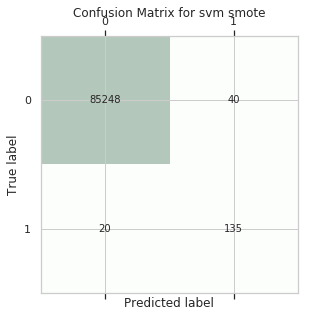

Precision: 0.771
Recall: 0.871
F1: 0.818


In [47]:
y_pred=bla.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)
draw_ConfusionMatrix(confmat, 'svm smote')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


# SVM Pomoću traženja težina klasa


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
param_range = [0.01,0.5,0.7]

pipe_svc = Pipeline([('classifier', SVC(random_state = 5))])
param_grid = [{'classifier__C': param_range
               ,
               'classifier__class_weight':[{0:.1, 1:.9},{0:.01, 1:.99},'balanced',{0:.3, 1:.7},{0:.2, 1:.8}]
              ,  
               'classifier__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  cv=2,verbose=100,
                  n_jobs=1)

X_gridopt, X_train1, y_gridopt, y_train1 = train_test_split(x, y, test_size=0.85, random_state=5)
gs = gs.fit(X_gridopt, y_gridopt)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] classifier__C=0.01, classifier__class_weight={0: 0.1, 1: 0.9}, classifier__kernel=linear 
[CV]  classifier__C=0.01, classifier__class_weight={0: 0.1, 1: 0.9}, classifier__kernel=linear, score=0.8421052631578948, total=   0.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV] classifier__C=0.01, classifier__class_weight={0: 0.1, 1: 0.9}, classifier__kernel=linear 
[CV]  classifier__C=0.01, classifier__class_weight={0: 0.1, 1: 0.9}, classifier__kernel=linear, score=0.8461538461538461, total=   0.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[CV] classifier__C=0.01, classifier__class_weight={0: 0.01, 1: 0.99}, classifier__kernel=linear 
[CV]  classifier__C=0.01, classifier__class_weight={0: 0.01, 1: 0.99}, classifier__kernel=linear, score=0.7356321839080461, total=   2.3s
[

[CV]  classifier__C=0.7, classifier__class_weight={0: 0.3, 1: 0.7}, classifier__kernel=linear, score=0.8266666666666667, total=   0.5s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   39.5s remaining:    0.0s
[CV] classifier__C=0.7, classifier__class_weight={0: 0.3, 1: 0.7}, classifier__kernel=linear 
[CV]  classifier__C=0.7, classifier__class_weight={0: 0.3, 1: 0.7}, classifier__kernel=linear, score=0.8461538461538461, total=   0.4s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   40.0s remaining:    0.0s
[CV] classifier__C=0.7, classifier__class_weight={0: 0.2, 1: 0.8}, classifier__kernel=linear 
[CV]  classifier__C=0.7, classifier__class_weight={0: 0.2, 1: 0.8}, classifier__kernel=linear, score=0.8266666666666667, total=   0.6s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   40.6s remaining:    0.0s
[CV] classifier__C=0.7, classifier__class_weight={0: 0.2, 1: 0.8}, classifier__kernel=linear 
[CV]  classifier__C=0.7, classifier__class_weight={0: 0.2, 1: 0.8}, class

In [8]:
print(gs.best_params_)
gridsearch_best_estimator=gs.best_estimator_
print(X_train.shape)

{'classifier__C': 0.01, 'classifier__class_weight': {0: 0.1, 1: 0.9}, 'classifier__kernel': 'linear'}
(199364, 30)


In [9]:
bla=gridsearch_best_estimator.fit(X_train,y_train) 

[[85264    24]
 [   23   132]]


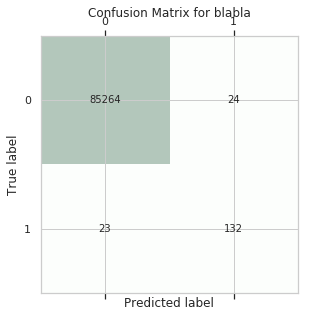

Precision: 0.846
Recall: 0.852
F1: 0.849


In [20]:
y_pred=bla.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)
draw_ConfusionMatrix(confmat,"blabla")
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# svm rus 

{'classifier__C': 0.001, 'classifier__kernel': 'linear', 'rus__sampling_strategy': 0.005}
[[85264    24]
 [   23   132]]


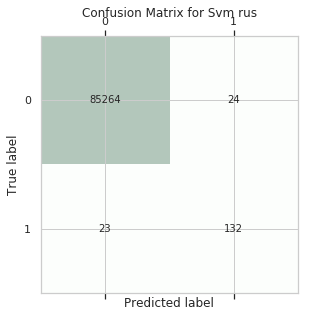

Precision: 0.846
Recall: 0.852
F1: 0.849


In [19]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC

pipe_svc = Pipeline([('rus', RandomUnderSampler(random_state=42)),
                        ('classifier', SVC(random_state = 5))
                       ])
from sklearn.metrics import precision_score, recall_score, f1_score
param_range = [0.0005,0.001,0.0015]
smt_param_range = [0.005,0.01,0.015]
param_grid = [{'classifier__C': param_range
               ,
               
               'rus__sampling_strategy':smt_param_range, 
               'classifier__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  cv=2,
                  n_jobs=1)

gs = gs.fit(X_train, y_train)
print(gs.best_params_)
gridsearch_best_estimator=gs.best_estimator_
bla=gridsearch_best_estimator.fit(X_train,y_train)
y_pred=bla.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)
draw_ConfusionMatrix(confmat,"Svm rus")
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# Logreg rus

/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


{'classifier__C': 0.001, 'classifier__gamma': 0.0005, 'classifier__kernel': 'linear', 'rus__sampling_strategy': 0.005}
Pipeline(memory=None,
     steps=[('rus', RandomUnderSampler(random_state=42, ratio=None, replacement=False,
          return_indices=False, sampling_strategy=0.01)), ('classifier', LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])
[[85253    35]
 [   32   123]]


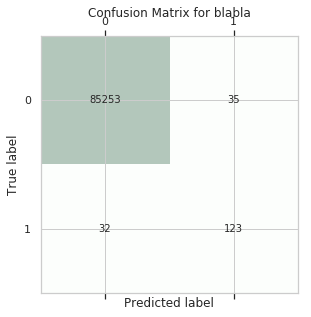

Acc: 0.999
Precision: 0.778
Recall: 0.794
F1: 0.786


In [41]:
from sklearn.linear_model import LogisticRegression as LR
from imblearn.under_sampling import RandomUnderSampler

lr_pipeline = Pipeline([('rus', RandomUnderSampler(random_state=42)),
                        ('classifier', LR(random_state = 5,solver='lbfgs'))
                       ])


from sklearn.model_selection import GridSearchCV #new with version 0.18
from sklearn.model_selection import cross_validate
lr_param_range = [0.0005,0.001,0.05,0.1,0.3,0.5,1,3,5]
lr_param_range1 = [0.005,0.01,0.015,0.09,0.1,0.2]
lr_param_grid = [{'classifier__C':lr_param_range,'rus__sampling_strategy':lr_param_range1},
                 
                ]
gridsearch_lr1 = GridSearchCV(estimator = lr_pipeline,
                          param_grid = lr_param_grid,
                          scoring='f1',
                          n_jobs=1  ,
                          cv = 2)

gridsearch_lr1.fit(X_train,y_train)
print(gs.best_params_)
gridsearch_best_estimator=gridsearch_lr1.best_estimator_

from sklearn.metrics import precision_score, recall_score, f1_score
print(gridsearch_best_estimator)
bla=gridsearch_best_estimator.fit(X_train,y_train)
score = bla.score(X_test, y_test)
y_pred=bla.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)
draw_ConfusionMatrix(confmat,"blabla")
print('Acc: %.3f' % score)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


# log class_weight=blanced

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression as LR
from imblearn.pipeline import Pipeline
param_range = [0.05,0.1,0.15,0.2,0.25,0.3,0.4]


pipe_svc = Pipeline([('classifier', LR(random_state = 5,class_weight='balanced'))])
param_grid = [{'classifier__C': param_range,
    'classifier__class_weight':[{0:.1, 1:.9},{0:.01, 1:.99},'balanced',{0:.3, 1:.7},{0:.2, 1:.99}]
              }]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  cv=2,verbose=100,
                  n_jobs=1)

gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 35 candidates, totalling 70 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] classifier__C=0.05, classifier__class_weight={0: 0.1, 1: 0.9} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7833827893175074, total=  20.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.2s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.1, 1: 0.9} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7846607669616519, total=   0.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.2s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.01, 1: 0.99} .


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.5622489959839357, total=   0.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.1s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.01, 1: 0.99} .


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.5222222222222223, total=   0.8s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.0s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight=balanced ...........


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight=balanced, score=0.11127933383800151, total=   2.6s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.7s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight=balanced ...........


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight=balanced, score=0.10688591983556012, total=   2.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.8s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.3, 1: 0.7} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7583892617449665, total=   0.9s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   28.7s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.3, 1: 0.7} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7583892617449665, total=   1.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.8s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.2, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.8012422360248448, total=   1.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.9s remaining:    0.0s
[CV] classifier__C=0.05, classifier__class_weight={0: 0.2, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.05, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7854984894259818, total=   0.9s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   31.9s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7869822485207101, total=   1.1s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   33.0s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.788235294117647, total=   1.3s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   34.4s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.5081081081081081, total=   1.2s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   35.6s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.45283018867924535, total=   1.3s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   37.0s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight=balanced, score=0.1112372304199773, total=   3.3s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   40.4s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight=balanced, score=0.10637572451414933, total=   3.1s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   43.6s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7533333333333332, total=   1.1s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   44.7s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.76158940397351, total=   1.1s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   45.9s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.787878787878788, total=   1.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   47.0s remaining:    0.0s
[CV] classifier__C=0.1, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.1, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7784431137724551, total=   1.1s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   48.2s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.1, 1: 0.9} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7833827893175074, total=   1.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   49.3s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.1, 1: 0.9} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.78134110787172, total=   1.1s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   50.4s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.01, 1: 0.99} .


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.48122866894197946, total=   1.1s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   51.5s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.01, 1: 0.99} .


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.41739130434782606, total=   1.1s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   52.7s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight=balanced ...........


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight=balanced, score=0.11153262518968134, total=   2.5s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   55.2s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight=balanced ...........


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight=balanced, score=0.10641200545702593, total=   2.9s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   58.1s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.3, 1: 0.7} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7672131147540984, total=   1.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   59.2s remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.3, 1: 0.7} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7631578947368423, total=   1.3s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  1.0min remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.2, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7818181818181819, total=   1.4s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  1.0min remaining:    0.0s
[CV] classifier__C=0.15, classifier__class_weight={0: 0.2, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.15, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7761194029850746, total=   1.9s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7833827893175074, total=   1.6s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:  1.1min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.78134110787172, total=   1.4s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.1min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.46229508196721303, total=   1.3s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.1min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.3983402489626556, total=   1.3s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  1.2min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight=balanced, score=0.11149032992036406, total=   2.5s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight=balanced, score=0.10648464163822526, total=   2.3s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.2min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7647058823529411, total=   1.1s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  1.3min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.762214983713355, total=   1.5s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  1.3min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7818181818181819, total=   1.2s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  1.3min remaining:    0.0s
[CV] classifier__C=0.2, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.2, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7761194029850746, total=   1.7s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.1, 1: 0.9} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7810650887573964, total=   1.7s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:  1.4min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.1, 1: 0.9} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7871720116618075, total=   1.9s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  1.4min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.01, 1: 0.99} .


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.45192307692307687, total=   1.5s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  1.4min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.01, 1: 0.99} .


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.3855421686746987, total=   1.6s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  1.5min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight=balanced ...........


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight=balanced, score=0.11140583554376657, total=   3.4s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.5min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight=balanced ...........


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight=balanced, score=0.10630323679727428, total=   3.4s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  1.6min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.3, 1: 0.7} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7687296416938111, total=   1.2s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  1.6min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.3, 1: 0.7} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7588424437299035, total=   1.6s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.6min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.2, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7794561933534742, total=   1.2s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:  1.6min remaining:    0.0s
[CV] classifier__C=0.25, classifier__class_weight={0: 0.2, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.25, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7761194029850746, total=   1.9s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7787610619469028, total=   1.7s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:  1.7min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7848837209302326, total=   1.5s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:  1.7min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.44270015698587123, total=   1.2s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  1.8min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.37894736842105264, total=   1.3s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.8min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight=balanced, score=0.11161731207289294, total=   2.7s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.8min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight=balanced, score=0.10633946830265849, total=   2.9s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  1.9min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7637540453074433, total=   1.2s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  1.9min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7564102564102564, total=   1.2s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:  1.9min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.778443113772455, total=   1.3s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:  1.9min remaining:    0.0s
[CV] classifier__C=0.3, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.3, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7761194029850746, total=   1.5s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.0min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7787610619469028, total=   1.4s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  2.0min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.1, 1: 0.9} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.1, 1: 0.9}, score=0.7848837209302326, total=   1.3s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:  2.0min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.4285714285714285, total=   1.2s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  2.0min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.01, 1: 0.99} ..


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.01, 1: 0.99}, score=0.37037037037037035, total=   1.1s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.1min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight=balanced, score=0.11149032992036406, total=   3.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  2.1min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight=balanced ............


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight=balanced, score=0.10558583106267032, total=   3.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:  2.2min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7628205128205128, total=   1.2s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:  2.2min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.3, 1: 0.7} ....


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.3, 1: 0.7}, score=0.7564102564102564, total=   1.4s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:  2.2min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.778443113772455, total=   1.1s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:  2.2min remaining:    0.0s
[CV] classifier__C=0.4, classifier__class_weight={0: 0.2, 1: 0.99} ...


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  classifier__C=0.4, classifier__class_weight={0: 0.2, 1: 0.99}, score=0.7761194029850746, total=   1.7s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.3min finished


/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print(gs.best_params_)
gridsearch_best_estimator=gs.best_estimator_
print(X_train.shape)

{'classifier__C': 0.05, 'classifier__class_weight': {0: 0.2, 1: 0.99}}
(199364, 30)


In [51]:
bla=gridsearch_best_estimator.fit(X_train,y_train) 

/home/matej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[85257    31]
 [   27   128]]


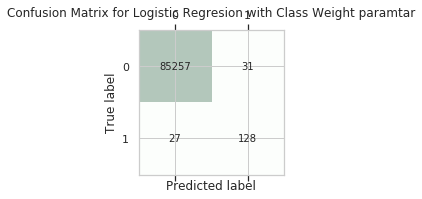

Precision: 0.805
Recall: 0.826
F1: 0.815


In [52]:
y_pred=bla.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)
draw_ConfusionMatrix(confmat,"Logistic Regresion with Class Weight paramtar")

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))